## 3.2 Pie Chart


In [45]:
#loanding pandas and matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re as re
import datetime as datetime

%matplotlib inline 

colormap=plt.cm.Paired

In [2]:
#READ IN CSV HERE>>
df_final_1 = pd.read_csv('C:/Users/juans/Desktop/Python Final Project/df_final_user_primary_lang.csv')
# df_final_2 = pd.read_csv('C:/Users/juans/Desktop/Python Final Project/df_final.csv')
df_final_1.rename(columns={'primary_lang':'lang'}, inplace=True)
df_final_1.head()

,tweet_username,lang,city,tweet_date,user_tweet_count,city_lang_total,city_total,lang_share
0,zzzkaki,ja,paris,2017-07-20,1,12,1882,0.006376
1,TPhiizL,en,paris,2014-10-20,2,703,8970,0.078372
2,ozgurozsar,tr,paris,2016-04-20,1,12,2887,0.004157
3,ozgurozgencer,tr,paris,2019-04-20,1,106,8764,0.012095
4,TMontparnasse,fr,paris,2019-10-20,1,6716,8445,0.795263


In [3]:
print(df_final_1.city.unique())

['paris' 'munich' 'gaziantep' 'budapest' 'berlin']


In [4]:
df_final_1.loc[df_final_1["lang"] == "lang detect failed"].count()

tweet_username      133
lang                133
city                133
tweet_date          133
user_tweet_count    133
city_lang_total     133
city_total          133
lang_share          133
dtype: int64

In [5]:
#drop rows where lang detect failed
df_final_1 = df_final_1[df_final_1.lang != "lang detect failed"]

## 3.2.1 All Cities Visualization

In [6]:
#Sanity check: most spoken languages
print(df_final_1.groupby(["lang"])["lang"].count().reset_index(name="lang_count").sort_values(by='lang_count', ascending=False))

     lang  lang_count
15     fr       25321
10     en       23812
8      de       10689
43     tr        7502
11     es        2344
19     hu        1683
31     pt        1175
21     it         841
1      ar         814
20     id         772
28     nl         751
33     ru         487
22     ja         462
4      ca         436
42     tl         384
32     ro         308
0      af         287
29     no         269
36     so         259
38     sv         242
12     et         197
7      da         138
41     th         135
30     pl         129
14     fi         126
18     hr         113
13     fa         111
6      cy          95
35     sl          87
23     ko          76
39     sw          70
24     lt          63
2      bg          50
25     lv          49
16     he          45
46     vi          43
37     sq          42
5      cs          39
34     sk          37
9      el          29
44     uk          28
45     ur          26
26     mk          21
47  zh-cn          19
27     ne 

In [7]:
#Sanity check: total langauge in DataSet
print(df_final_1.lang.unique())

['ja' 'en' 'tr' 'fr' 'so' 'nl' 'pt' 'ca' 'ro' 'es' 'de' 'th' 'et' 'bg'
 'it' 'sl' 'he' 'lt' 'ar' 'hu' 'id' 'da' 'af' 'sv' 'pl' 'ru' 'fi' 'fa'
 'sk' 'lv' 'cy' 'no' 'tl' 'sq' 'vi' 'sw' 'cs' 'ko' 'ur' 'hr' 'zh-cn' 'ta'
 'mk' 'ne' 'el' 'zh-tw' 'hi' 'bn' 'uk']


In [8]:
#by Group
#create table with total daily counts
day_total_count = df_final_1.groupby(["tweet_date"])["lang"].count()\
                                             .reset_index(name="day_total_count")
day_total_count.head()

,tweet_date,day_total_count
0,2014-04-20,3519
1,2014-07-20,3714
2,2014-10-20,3134
3,2015-01-20,3432
4,2015-04-20,3610


In [9]:
# Create data frame (lang_pie_3_pivot) with share of language per date per language
lang_pie = df_final_1.groupby(["tweet_date","lang"])["lang"].count().reset_index(name="lang_day_count").sort_values(by=['lang','tweet_date'])
lang_pie2 = lang_pie.merge(day_total_count, left_on='tweet_date', right_on='tweet_date')
lang_pie2['lang_share_day'] = lang_pie2.lang_day_count/lang_pie2.day_total_count*100
lang_pie3 = lang_pie2.set_index(['tweet_date','lang'], drop = False)
lang_pie3_pivot = lang_pie3.pivot(index='tweet_date', columns='lang', values='lang_share_day')

In [10]:
lang_pie3

tweet_date   lang  lang_day_count  day_total_count  \
tweet_date lang                                                        
2014-04-20 af     2014-04-20     af              15             3519   
           ar     2014-04-20     ar              23             3519   
           bg     2014-04-20     bg               2             3519   
           ca     2014-04-20     ca              27             3519   
           cs     2014-04-20     cs               3             3519   
           cy     2014-04-20     cy               8             3519   
           da     2014-04-20     da              11             3519   
           de     2014-04-20     de             386             3519   
           el     2014-04-20     el               1             3519   
           en     2014-04-20     en             713             3519   
           es     2014-04-20     es              95             3519   
           et     2014-04-20     et              16             3519   
           fa     2014-04-20     fa               1             3519   
           fi     2014-04-20     fi              17             3519   
           fr     2014-04-20     fr            1321             3519   
           he     2014-04-20     he               1             3519   
           hr     2014-04-20     hr               6             3519   
           hu     2014-04-20     hu              73             3519   
           id     2014-04-20     id              38             3519   
           it     2014-04-20     it              52             3519   
           ja     2014-04-20     ja              10             3519   
           ko     2014-04-20     ko               1             3519   
           lt     2014-04-20     lt               5             3519   
           lv     2014-04-20     lv               4             3519   
           mk     2014-04-20     mk               2             3519   
           nl     2014-04-20     nl              54             3519   
           no     2014-04-20     no              17             3519   
           pl     2014-04-20     pl               6             3519   
           pt     2014-04-20     pt              37             3519   
           ro     2014-04-20     ro              17             3519   
...                      ...    ...             ...              ...   
2020-04-20 hr     2020-04-20     hr              30            13036   
           hu     2020-04-20     hu             497            13036   
           id     2020-04-20     id             122            13036   
           it     2020-04-20     it              81            13036   
           ja     2020-04-20     ja             156            13036   
           ko     2020-04-20     ko              22            13036   
           lt     2020-04-20     lt               9            13036   
           lv     2020-04-20     lv               5            13036   
           mk     2020-04-20     mk               4            13036   
           nl     2020-04-20     nl              66            13036   
           no     2020-04-20     no              40            13036   
           pl     2020-04-20     pl              37            13036   
           pt     2020-04-20     pt             214            13036   
           ro     2020-04-20     ro              24            13036   
           ru     2020-04-20     ru              91            13036   
           sk     2020-04-20     sk              10            13036   
           sl     2020-04-20     sl              17            13036   
           so     2020-04-20     so              89            13036   
           sq     2020-04-20     sq              15            13036   
           sv     2020-04-20     sv              34            13036   
           sw     2020-04-20     sw              21            13036   
           ta     2020-04-20     ta               2            13036   
           th     2020-04-20     th              48       

In [11]:
lang_pie3_pivot = lang_pie3_pivot.fillna(0)
lang_pie3_pivot.head()

lang,af,ar,bg,bn,ca,cs,cy,da,de,el,...,sw,ta,th,tl,tr,uk,ur,vi,zh-cn,zh-tw
tweet_date,,,,,,,,,,,,,,,,,,,,,
2014-04-20,0.426257,0.653595,0.056834,0.0,0.767263,0.085251,0.227337,0.312589,10.969025,0.028417,...,0.170503,0.000000,0.170503,0.483092,12.816141,0.028417,0.028417,0.113669,0.000000,0.0
2014-07-20,0.323102,0.969305,0.134626,0.0,0.619278,0.080775,0.215401,0.350027,11.200862,0.080775,...,0.161551,0.000000,0.080775,0.350027,9.746904,0.107701,0.000000,0.026925,0.000000,0.0
2014-10-20,0.446713,0.925335,0.063816,0.0,0.446713,0.000000,0.127632,0.063816,12.380345,0.063816,...,0.095724,0.000000,0.031908,0.446713,11.295469,0.000000,0.000000,0.063816,0.000000,0.0
2015-01-20,0.611888,0.874126,0.029138,0.0,0.466200,0.116550,0.116550,0.174825,12.208625,0.058275,...,0.116550,0.029138,0.000000,0.407925,9.906760,0.029138,0.029138,0.029138,0.029138,0.0
2015-04-20,0.498615,0.831025,0.083102,0.0,0.526316,0.055402,0.221607,0.249307,13.795014,0.027701,...,0.138504,0.000000,0.166205,0.332410,10.664820,0.000000,0.055402,0.055402,0.000000,0.0


In [12]:
#create df per year with language and langauge share
lang_pie2014 = pd.DataFrame(lang_pie3_pivot.iloc[0:3].mean(axis=0).sort_values(ascending=False)).rename(columns={0:'Value'})
lang_pie2015 = pd.DataFrame(lang_pie3_pivot.iloc[3:7].mean(axis=0).sort_values(ascending=False)).rename(columns={0:'Value'})
lang_pie2016 = pd.DataFrame(lang_pie3_pivot.iloc[7:11].mean(axis=0).sort_values(ascending=False)).rename(columns={0:'Value'})
lang_pie2017 = pd.DataFrame(lang_pie3_pivot.iloc[11:15].mean(axis=0).sort_values(ascending=False)).rename(columns={0:'Value'})
lang_pie2018 = pd.DataFrame(lang_pie3_pivot.iloc[15:19].mean(axis=0).sort_values(ascending=False)).rename(columns={0:'Value'})
lang_pie2019 = pd.DataFrame(lang_pie3_pivot.iloc[19:23].mean(axis=0).sort_values(ascending=False)).rename(columns={0:'Value'})
lang_pie2020 = pd.DataFrame(lang_pie3_pivot.iloc[23:].mean(axis=0).sort_values(ascending=False)).rename(columns={0:'Value'})

#Sanity check: all sums must be 100, as it is a Pie Chart
print(lang_pie2014.sum())
print(lang_pie2017.sum())
print(lang_pie2020.sum())

Value    100.0
dtype: float64
Value    100.0
dtype: float64
Value    100.0
dtype: float64


In [13]:
#defining the threshold 
threshold = 1

#SELECT YEAR TO PLOT HERE

lang_pie_subset1 =  lang_pie2020[lang_pie2020['Value'] >= threshold]
lang_pie_subset2 =  lang_pie2020[lang_pie2020['Value'] < threshold]
lang_pie_subset1.loc['Other'] = lang_pie_subset2.sum()

# To explode arabic and turkish in pie chart later on...
lang_pie_subset1['Explode'] = 0
lang_pie_subset1.loc[lang_pie_subset1.index == 'tr', 'Explode'] = 0.15
lang_pie_subset1.loc[lang_pie_subset1.index == 'ar', 'Explode'] = 0.15

lang_pie_subset1

C:\Users\juans\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\juans\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\juans\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#

,Value,Explode
lang,,
fr,28.630887,0.00
en,21.801879,0.00
de,16.012057,0.00
tr,15.157494,0.15
es,2.753688,0.00
hu,2.652974,0.00
pt,1.686993,0.00
ar,1.402261,0.15
ja,1.076240,0.00


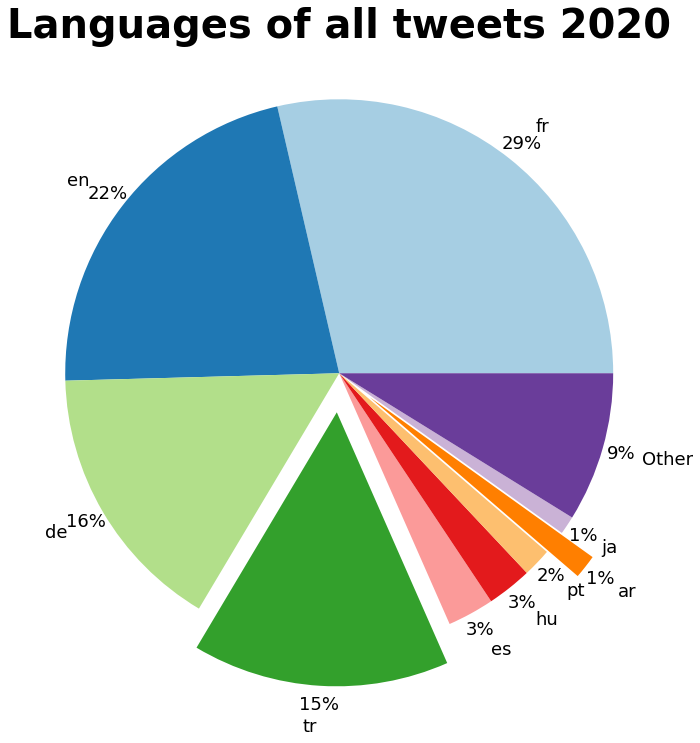

In [15]:
plt.style.use("bmh")
plt.figure(figsize=(17,12))

slices = lang_pie_subset1['Value']
labels = lang_pie_subset1.index
explode = lang_pie_subset1['Explode']
colors = [colormap(i) for i in np.linspace(0,1,12)]

plt.pie(slices, explode=explode, labels=labels, labeldistance=1.15,
        textprops=dict(size=18),  
        autopct='%1.f%%', pctdistance=1.07,
        radius=1.05, colors=colors)

#DONT FORGET TO CHANGE TITLE YEAR
plt.title("Languages of all tweets 2020", weight="bold", 
          color="black", size=40)
# plt.tight_layout()
plt.show()

## 3.2.2 Gaziantep

In [137]:
df_Gaziantep = df_final_1.loc[df_final_1['city'] == 'gaziantep']
df_Gaziantep.head()

,tweet_username,lang,city,tweet_date,user_tweet_count,city_lang_total,city_total,lang_share
49970,armaganbatus,tr,gaziantep,2014-07-20,3,870,975,0.892308
49971,iremcalisiir,tr,gaziantep,2014-07-20,5,870,975,0.892308
49972,arik_saime,tr,gaziantep,2019-10-20,5,471,553,0.851718
49973,yilmaz_alisarac,tr,gaziantep,2015-04-20,1,733,789,0.929024
49974,slmngvnc,tr,gaziantep,2014-07-20,1,870,975,0.892308


In [138]:
#Sanity check: most spoken languages
print(df_Gaziantep.groupby(["lang"])["lang"].count().reset_index(name="lang_count").sort_values(by='lang_count', ascending=False))

   lang  lang_count
31   tr        6490
6    en         258
14   id         121
15   it          71
1    ar          61
5    de          52
23   ro          37
30   tl          31
19   nl          27
26   so          25
8    et          18
4    da          14
0    af          11
28   sv          10
12   hr          10
20   no          10
29   sw           8
2    ca           7
10   fi           6
3    cy           6
22   pt           4
25   sl           4
33   vi           4
21   pl           4
13   hu           4
11   fr           4
24   sk           3
27   sq           3
7    es           3
18   lv           1
16   ko           1
9    fa           1
32   ur           1
17   lt           1


In [139]:
#Sanity check: total langauge in DataSet
print(df_Gaziantep.lang.unique())

['tr' 'en' 'id' 'tl' 'ro' 'sv' 'de' 'it' 'ca' 'sk' 'cy' 'da' 'so' 'sw'
 'lt' 'nl' 'vi' 'et' 'af' 'ar' 'fr' 'no' 'hu' 'sl' 'hr' 'sq' 'ur' 'es'
 'fi' 'pt' 'lv' 'pl' 'ko' 'fa']


In [140]:
#by Group
#create table with total daily counts
GZday_total_count = df_Gaziantep.groupby(["tweet_date"])["lang"].count()\
                                             .reset_index(name="day_total_count")
GZday_total_count.head()

,tweet_date,day_total_count
0,2014-04-20,501
1,2014-07-20,374
2,2014-10-20,362
3,2015-01-20,340
4,2015-04-20,379


In [141]:
# Create data frame (lang_pie_Gz3_pivot) with share of language per date per language
GZlang_pie = df_Gaziantep.groupby(["tweet_date","lang"])["lang"].count().reset_index(name="lang_day_count").sort_values(by=['lang','tweet_date'])
GZlang_pie2 = GZlang_pie.merge(GZday_total_count, left_on='tweet_date', right_on='tweet_date')
GZlang_pie2['lang_share_day'] = GZlang_pie2.lang_day_count/GZlang_pie2.day_total_count*100
GZlang_pie3 = GZlang_pie2.set_index(['tweet_date','lang'], drop = False)
GZlang_pie3_pivot = GZlang_pie3.pivot(index='tweet_date', columns='lang', values='lang_share_day')

In [142]:
GZlang_pie3_pivot = GZlang_pie3_pivot.fillna(0)
GZlang_pie3_pivot.head()

lang,af,ar,ca,cy,da,de,en,es,et,fa,...,sk,sl,so,sq,sv,sw,tl,tr,ur,vi
tweet_date,,,,,,,,,,,,,,,,,,,,,
2014-04-20,0.199601,0.399202,0.0,0.000000,0.399202,0.798403,11.177645,0.000000,0.199601,0.00000,...,0.000000,0.000000,0.399202,0.0,0.399202,0.399202,0.998004,79.441118,0.000000,0.0
2014-07-20,0.000000,1.069519,0.0,0.267380,0.267380,0.000000,9.090909,0.000000,0.267380,0.26738,...,0.000000,0.000000,0.267380,0.0,0.267380,0.000000,0.534759,83.422460,0.000000,0.0
2014-10-20,0.000000,0.552486,0.0,0.000000,0.276243,0.276243,4.419890,0.552486,0.276243,0.00000,...,0.000000,0.000000,0.552486,0.0,0.000000,0.000000,0.828729,86.740331,0.000000,0.0
2015-01-20,0.294118,0.882353,0.0,0.294118,0.294118,1.176471,3.235294,0.000000,0.294118,0.00000,...,0.294118,0.000000,0.882353,0.0,0.294118,0.294118,1.176471,87.058824,0.294118,0.0
2015-04-20,0.000000,0.000000,0.0,0.000000,0.263852,0.263852,2.902375,0.000000,0.000000,0.00000,...,0.000000,0.263852,0.791557,0.0,0.263852,0.000000,0.791557,88.918206,0.000000,0.0


In [143]:
#create df per year with language and language share
GZlang_pie2014 = pd.DataFrame(GZlang_pie3_pivot.iloc[0:3].mean(axis=0).sort_values(ascending=False)).rename(columns={0:'Value'})
GZlang_pie2015 = pd.DataFrame(GZlang_pie3_pivot.iloc[3:7].mean(axis=0).sort_values(ascending=False)).rename(columns={0:'Value'})
GZlang_pie2016 = pd.DataFrame(GZlang_pie3_pivot.iloc[7:11].mean(axis=0).sort_values(ascending=False)).rename(columns={0:'Value'})
GZlang_pie2017 = pd.DataFrame(GZlang_pie3_pivot.iloc[11:15].mean(axis=0).sort_values(ascending=False)).rename(columns={0:'Value'})
GZlang_pie2018 = pd.DataFrame(GZlang_pie3_pivot.iloc[15:19].mean(axis=0).sort_values(ascending=False)).rename(columns={0:'Value'})
GZlang_pie2019 = pd.DataFrame(GZlang_pie3_pivot.iloc[19:23].mean(axis=0).sort_values(ascending=False)).rename(columns={0:'Value'})
GZlang_pie2020 = pd.DataFrame(GZlang_pie3_pivot.iloc[23:].mean(axis=0).sort_values(ascending=False)).rename(columns={0:'Value'})

#Sanity check: sum must be 100
print(GZlang_pie2014.sum())
print(GZlang_pie2017.sum())
print(GZlang_pie2020.sum())

Value    100.0
dtype: float64
Value    100.0
dtype: float64
Value    100.0
dtype: float64


In [156]:
#SELECT YEAR TO GAZIANTEP PLOT HERE
pie = GZlang_pie2020

#define the threshold 
threshold = 1

lang_pie_subset1 =  pie[pie['Value'] >= threshold]
lang_pie_subset2 =  pie[pie['Value'] < threshold]
lang_pie_subset1.loc['Other'] = lang_pie_subset2.sum()

# To explode arabic and turkish in pie chart later on...
lang_pie_subset1['Explode'] = 0
lang_pie_subset1.loc[lang_pie_subset1.index == 'tr', 'Explode'] = 0.15
lang_pie_subset1.loc[lang_pie_subset1.index == 'ar', 'Explode'] = 0.15

lang_pie_subset1

C:\Users\juans\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\juans\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\juans\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing

,Value,Explode
lang,,
tr,92.973935,0.15
id,1.135213,0.00
ar,1.113910,0.15
Other,4.776942,0.00


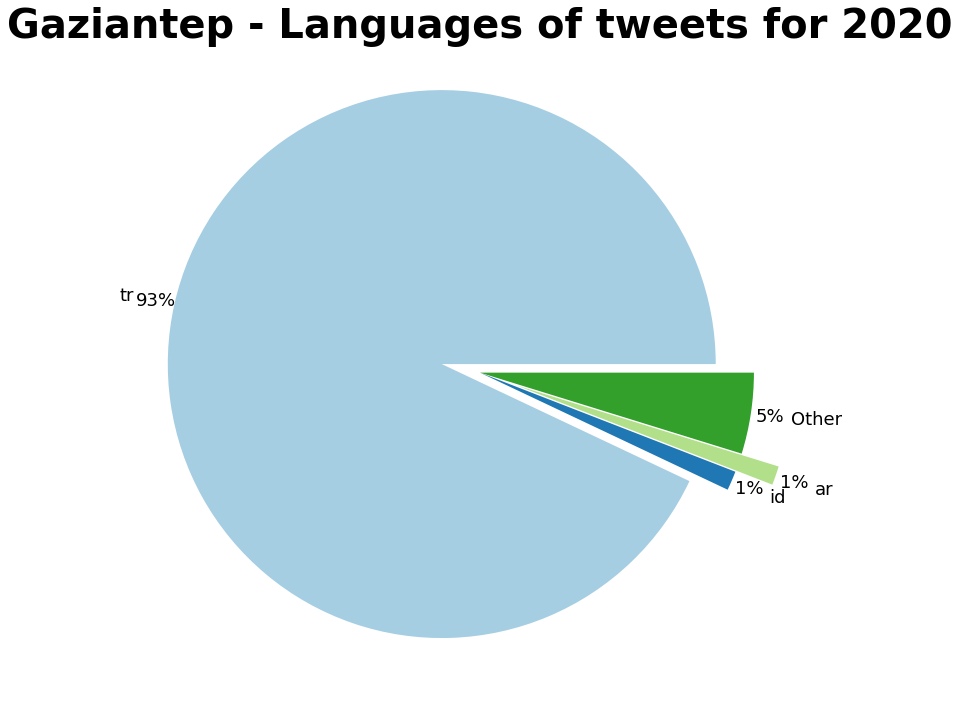

In [157]:
plt.style.use("bmh")
plt.figure(figsize=(17,12))

slices = lang_pie_subset1['Value']
labels = lang_pie_subset1.index
explode = lang_pie_subset1['Explode']
colors = [colormap(i) for i in np.linspace(0,1,12)]

plt.pie(slices, explode=explode, labels=labels, labeldistance=1.15,
        textprops=dict(size=18),  
        autopct='%1.f%%', pctdistance=1.07,
        radius=1.05, colors=colors)

#DONT FORGET TO CHANGE TITLE YEAR
plt.title("Gaziantep - Languages of tweets for 2020", weight="bold", 
          color="black", size=40)
# plt.tight_layout()
plt.show() 

In [55]:
# GZlang_pie2018 = pd.DataFrame(GZlang_pie3_pivot.iloc[0:3].sum(axis=0).div(3).sort_values(ascending=False))
# GZlang_pie2018.columns = ['Value']
# #defining the threshold 
# threshold = 1
# GZlang_pie2018_subset1 =  GZlang_pie2018[GZlang_pie2018['Value'] >= threshold]
# GZlang_pie2018_subset2 =  GZlang_pie2018[GZlang_pie2018['Value'] < threshold]
# GZlang_pie2018_subset1.loc['Other']= GZlang_pie2018_subset2.sum()

# GZplot1 = GZlang_pie2018_subset1.plot.pie(y='Value', figsize=(10, 10),autopct='%1.1f%%')
# GZplot1.set_title("Gaziantep - Languages of all tweets 2018", weight="bold", color="black", size=20)

## 3.2.3 Budapest

In [158]:
df_Budapest = df_final_1.loc[df_final_1['city'] == 'budapest']
df_Budapest.head()

,tweet_username,lang,city,tweet_date,user_tweet_count,city_lang_total,city_total,lang_share
57288,kellyarevalofr,en,budapest,2020-04-20,5,2466,8255,0.298728
57289,zs__,hu,budapest,2015-04-20,1,209,584,0.357877
57290,sarahadamhafez,en,budapest,2015-01-20,1,192,460,0.417391
57291,mihalykopeter,hu,budapest,2017-01-20,1,85,251,0.338645
57292,rubenballesta,es,budapest,2019-10-20,5,50,784,0.063776


In [159]:
#Sanity check: most spoken languages
print(df_Budapest.groupby(["lang"])["lang"].count().reset_index(name="lang_count").sort_values(by='lang_count', ascending=False))

     lang  lang_count
9      en        2772
18     hu        1632
10     es         286
19     id         239
40     tl         203
41     tr         138
29     pt         103
14     fr          93
7      de          91
31     ru          91
21     ja          84
30     ro          65
20     it          61
39     th          44
27     no          43
1      ar          42
3      ca          42
26     nl          38
36     sv          29
34     so          29
11     et          23
0      af          17
33     sl          16
17     hr          15
28     pl          15
12     fa          13
22     ko          12
32     sk          11
6      da          10
37     sw          10
4      cs           9
13     fi           8
15     he           7
42     uk           7
44     vi           6
5      cy           5
45  zh-cn           4
2      bg           4
35     sq           3
25     mk           3
23     lt           3
24     lv           2
38     ta           1
16     hi           1
8      el 

In [160]:
#by Group
#create table with total daily counts
BPday_total_count = df_Budapest.groupby(["tweet_date"])["lang"].count()\
                                             .reset_index(name="day_total_count")
BPday_total_count.head()

,tweet_date,day_total_count
0,2014-04-20,258
1,2014-07-20,283
2,2014-10-20,220
3,2015-01-20,209
4,2015-04-20,230


In [161]:
# Create data frame (lang_pie_Gz3_pivot) with share of language per date per language
BPlang_pie = df_Budapest.groupby(["tweet_date","lang"])["lang"].count().reset_index(name="lang_day_count").sort_values(by=['lang','tweet_date'])
BPlang_pie2 = BPlang_pie.merge(BPday_total_count, left_on='tweet_date', right_on='tweet_date')
BPlang_pie2['lang_share_day'] = BPlang_pie2.lang_day_count/BPlang_pie2.day_total_count*100
BPlang_pie3 = BPlang_pie2.set_index(['tweet_date','lang'], drop = False)
BPlang_pie3_pivot = BPlang_pie3.pivot(index='tweet_date', columns='lang', values='lang_share_day')

In [162]:
BPlang_pie3_pivot = BPlang_pie3_pivot.fillna(0)
BPlang_pie3_pivot.head()

lang,af,ar,bg,ca,cs,cy,da,de,el,en,...,sv,sw,ta,th,tl,tr,uk,ur,vi,zh-cn
tweet_date,,,,,,,,,,,,,,,,,,,,,
2014-04-20,0.387597,0.387597,0.0,0.000000,0.387597,0.387597,0.387597,1.550388,0.000000,43.798450,...,0.387597,0.0,0.0,0.387597,1.162791,3.875969,0.000000,0.0,0.0,0.0
2014-07-20,0.353357,0.000000,0.0,1.060071,0.000000,0.000000,1.413428,0.706714,0.353357,43.109541,...,1.060071,0.0,0.0,0.000000,0.706714,2.120141,0.353357,0.0,0.0,0.0
2014-10-20,0.454545,0.909091,0.0,0.000000,0.000000,0.000000,0.000000,0.454545,0.000000,40.000000,...,0.909091,0.0,0.0,0.000000,1.363636,1.818182,0.000000,0.0,0.0,0.0
2015-01-20,0.000000,0.478469,0.0,0.478469,0.478469,0.478469,0.478469,2.392344,0.000000,45.933014,...,0.956938,0.0,0.0,0.000000,0.478469,1.913876,0.000000,0.0,0.0,0.0
2015-04-20,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.739130,0.000000,44.347826,...,0.869565,0.0,0.0,0.000000,0.434783,0.869565,0.000000,0.0,0.0,0.0


In [163]:
#create df per year with language and language share
BPlang_pie2014 = pd.DataFrame(BPlang_pie3_pivot.iloc[0:3].mean(axis=0).sort_values(ascending=False)).rename(columns={0:'Value'})
BPlang_pie2015 = pd.DataFrame(BPlang_pie3_pivot.iloc[3:7].mean(axis=0).sort_values(ascending=False)).rename(columns={0:'Value'})
BPlang_pie2016 = pd.DataFrame(BPlang_pie3_pivot.iloc[7:11].mean(axis=0).sort_values(ascending=False)).rename(columns={0:'Value'})
BPlang_pie2017 = pd.DataFrame(BPlang_pie3_pivot.iloc[11:15].mean(axis=0).sort_values(ascending=False)).rename(columns={0:'Value'})
BPlang_pie2018 = pd.DataFrame(BPlang_pie3_pivot.iloc[15:19].mean(axis=0).sort_values(ascending=False)).rename(columns={0:'Value'})
BPlang_pie2019 = pd.DataFrame(BPlang_pie3_pivot.iloc[19:23].mean(axis=0).sort_values(ascending=False)).rename(columns={0:'Value'})
BPlang_pie2020 = pd.DataFrame(BPlang_pie3_pivot.iloc[23:].mean(axis=0).sort_values(ascending=False)).rename(columns={0:'Value'})

#Sanity check: sum must be 100
print(BPlang_pie2014.sum())
print(BPlang_pie2017.sum())
print(BPlang_pie2020.sum())

Value    100.0
dtype: float64
Value    100.0
dtype: float64
Value    100.0
dtype: float64


In [176]:
#SELECT YEAR of BUDAPEST TO  PLOT HERE
pie = BPlang_pie2014

#define the threshold 
threshold = 1

lang_pie_subset1 =  pie[pie['Value'] >= threshold]
lang_pie_subset2 =  pie[pie['Value'] < threshold]
lang_pie_subset1.loc['Other'] = lang_pie_subset2.sum()

# To explode arabic and turkish in pie chart later on...
lang_pie_subset1['Explode'] = 0
lang_pie_subset1.loc[lang_pie_subset1.index == 'tr', 'Explode'] = 0.15
lang_pie_subset1.loc[lang_pie_subset1.index == 'ar', 'Explode'] = 0.15

lang_pie_subset1

C:\Users\juans\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\juans\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\juans\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing

,Value,Explode
lang,,
en,42.302663,0.00
hu,29.690848,0.00
es,5.292563,0.00
tr,2.604764,0.15
ru,2.312126,0.00
id,1.852397,0.00
pt,1.722687,0.00
ro,1.711785,0.00
nl,1.616315,0.00


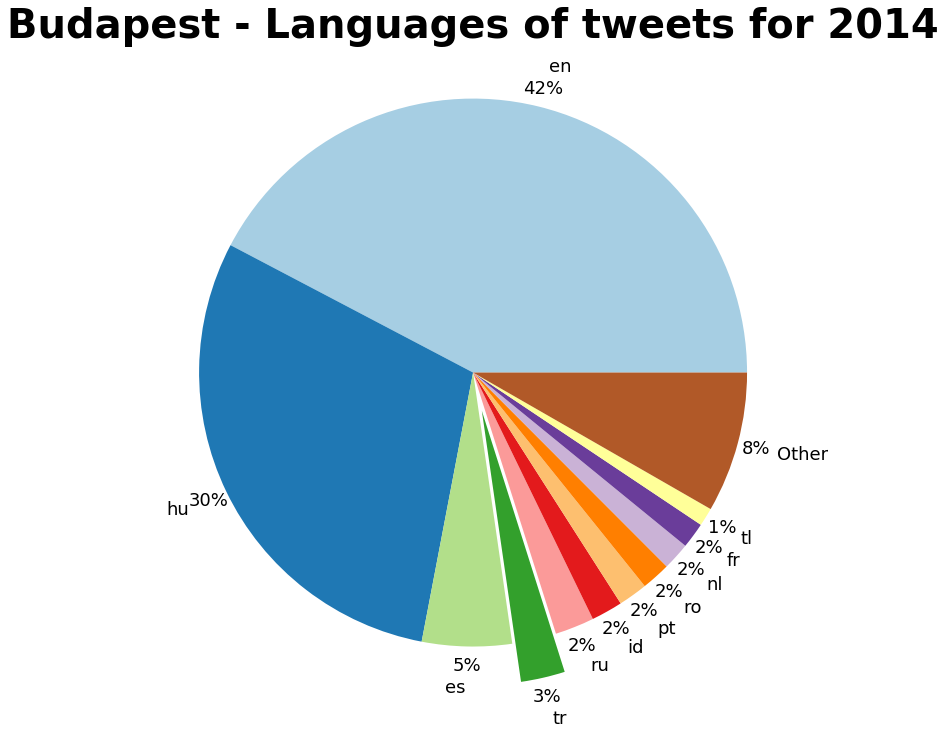

In [177]:
plt.style.use("bmh")
plt.figure(figsize=(17,12))

slices = lang_pie_subset1['Value']
labels = lang_pie_subset1.index
explode = lang_pie_subset1['Explode']
colors = [colormap(i) for i in np.linspace(0,1,12)]

plt.pie(slices, explode=explode, labels=labels, labeldistance=1.15,
        textprops=dict(size=18),  
        autopct='%1.f%%', pctdistance=1.07,
        radius=1.05, colors=colors)

#DONT FORGET TO CHANGE TITLE YEAR
plt.title("Budapest - Languages of tweets for 2014", weight="bold", 
          color="black", size=40)
# plt.tight_layout()
plt.show() 

## 3.2.4 Munich

In [109]:
df_Munich = df_final_1.loc[df_final_1['city'] == 'munich']
df_Munich.head()

,tweet_username,lang,city,tweet_date,user_tweet_count,city_lang_total,city_total,lang_share
41352,4Dpipeline,en,munich,2015-01-20,1,283,835,0.338922
41353,fger74,de,munich,2020-04-20,3,3722,8087,0.460245
41354,50hz,de,munich,2016-10-20,2,202,363,0.556474
41355,joe_dewhurst,en,munich,2020-04-20,2,1950,8087,0.241128
41356,federicocaiumi,en,munich,2017-01-20,1,101,277,0.364621


In [110]:
#Sanity check: most spoken languages
print(df_Munich.groupby(["lang"])["lang"].count().reset_index(name="lang_count").sort_values(by='lang_count', ascending=False))

     lang  lang_count
7      de        3597
9      en        3059
10     es         271
40     tr         263
1      ar         235
14     fr         172
29     pt         128
19     it         106
31     ru          97
20     ja          86
26     nl          72
18     id          47
3      ca          33
38     th          31
0      af          30
16     hr          30
12     fa          26
34     so          25
11     et          25
36     sv          25
28     pl          24
27     no          23
6      da          22
39     tl          20
30     ro          18
21     ko          16
8      el          14
17     hu          14
13     fi          12
2      bg          10
41     uk          10
37     sw           7
33     sl           6
23     lv           6
4      cs           6
5      cy           5
42     ur           5
15     he           4
32     sk           3
35     sq           3
24     mk           3
22     lt           3
44  zh-cn           3
43     vi           2
25     ne 

In [111]:
#by Group
#create table with total daily counts
MNday_total_count = df_Munich.groupby(["tweet_date"])["lang"].count()\
                                             .reset_index(name="day_total_count")
MNday_total_count.head()

,tweet_date,day_total_count
0,2014-04-20,350
1,2014-07-20,437
2,2014-10-20,300
3,2015-01-20,322
4,2015-04-20,363


In [112]:
# Create data frame (lang_pie_Gz3_pivot) with share of language per date per language
MNlang_pie = df_Munich.groupby(["tweet_date","lang"])["lang"].count().reset_index(name="lang_day_count").sort_values(by=['lang','tweet_date'])
MNlang_pie2 = MNlang_pie.merge(MNday_total_count, left_on='tweet_date', right_on='tweet_date')
MNlang_pie2['lang_share_day'] = MNlang_pie2.lang_day_count/MNlang_pie2.day_total_count*100
MNlang_pie3 = MNlang_pie2.set_index(['tweet_date','lang'], drop = False)
MNlang_pie3_pivot = MNlang_pie3.pivot(index='tweet_date', columns='lang', values='lang_share_day')

In [113]:
MNlang_pie3_pivot = MNlang_pie3_pivot.fillna(0)
MNlang_pie3_pivot.head()

lang,af,ar,bg,ca,cs,cy,da,de,el,en,...,sv,sw,th,tl,tr,uk,ur,vi,zh-cn,zh-tw
tweet_date,,,,,,,,,,,,,,,,,,,,,
2014-04-20,0.285714,2.285714,0.000000,0.285714,0.000000,0.285714,0.571429,37.428571,0.000000,36.285714,...,0.285714,0.000000,1.142857,0.000000,4.000000,0.285714,0.0,0.285714,0.0,0.0
2014-07-20,0.686499,3.661327,0.228833,0.228833,0.457666,0.000000,0.457666,33.638444,0.457666,33.867277,...,0.228833,0.000000,0.000000,0.228833,5.034325,0.457666,0.0,0.000000,0.0,0.0
2014-10-20,0.000000,4.333333,0.333333,0.000000,0.000000,0.000000,0.000000,47.666667,0.333333,28.000000,...,0.333333,0.000000,0.000000,1.000000,5.000000,0.000000,0.0,0.000000,0.0,0.0
2015-01-20,0.621118,2.484472,0.310559,0.000000,0.000000,0.000000,0.621118,41.304348,0.310559,38.819876,...,0.621118,0.000000,0.000000,0.310559,3.416149,0.310559,0.0,0.000000,0.0,0.0
2015-04-20,0.275482,3.581267,0.275482,0.000000,0.275482,0.000000,0.826446,41.046832,0.000000,34.710744,...,0.550964,0.275482,0.826446,0.000000,4.132231,0.000000,0.0,0.000000,0.0,0.0


In [114]:
#create df per year with language and language share
MNlang_pie2014 = pd.DataFrame(MNlang_pie3_pivot.iloc[0:3].mean(axis=0).sort_values(ascending=False)).rename(columns={0:'Value'})
MNlang_pie2015 = pd.DataFrame(MNlang_pie3_pivot.iloc[3:7].mean(axis=0).sort_values(ascending=False)).rename(columns={0:'Value'})
MNlang_pie2016 = pd.DataFrame(MNlang_pie3_pivot.iloc[7:11].mean(axis=0).sort_values(ascending=False)).rename(columns={0:'Value'})
MNlang_pie2017 = pd.DataFrame(MNlang_pie3_pivot.iloc[11:15].mean(axis=0).sort_values(ascending=False)).rename(columns={0:'Value'})
MNlang_pie2018 = pd.DataFrame(MNlang_pie3_pivot.iloc[15:19].mean(axis=0).sort_values(ascending=False)).rename(columns={0:'Value'})
MNlang_pie2019 = pd.DataFrame(MNlang_pie3_pivot.iloc[19:23].mean(axis=0).sort_values(ascending=False)).rename(columns={0:'Value'})
MNlang_pie2020 = pd.DataFrame(MNlang_pie3_pivot.iloc[23:].mean(axis=0).sort_values(ascending=False)).rename(columns={0:'Value'})

#Sanity check: sum must be 100
print(MNlang_pie2014.sum())
print(MNlang_pie2017.sum())
print(MNlang_pie2020.sum())

Value    100.0
dtype: float64
Value    100.0
dtype: float64
Value    100.0
dtype: float64


In [135]:
#SELECT YEAR of MUNICH TO PLOT HERE
pie = MNlang_pie2020

#define the threshold 
threshold = 1

lang_pie_subset1 =  pie[pie['Value'] >= threshold]
lang_pie_subset2 =  pie[pie['Value'] < threshold]
lang_pie_subset1.loc['Other'] = lang_pie_subset2.sum()

# To explode arabic and turkish in pie chart later on...
lang_pie_subset1['Explode'] = 0
lang_pie_subset1.loc[lang_pie_subset1.index == 'tr', 'Explode'] = 0.15
lang_pie_subset1.loc[lang_pie_subset1.index == 'ar', 'Explode'] = 0.15

lang_pie_subset1

C:\Users\juans\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\juans\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\juans\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing

,Value,Explode
lang,,
de,41.192741,0.00
en,33.276854,0.00
tr,3.782685,0.15
es,3.429365,0.00
fr,2.858512,0.00
ar,2.322414,0.15
pt,2.003593,0.00
ja,1.631918,0.00
it,1.530375,0.00


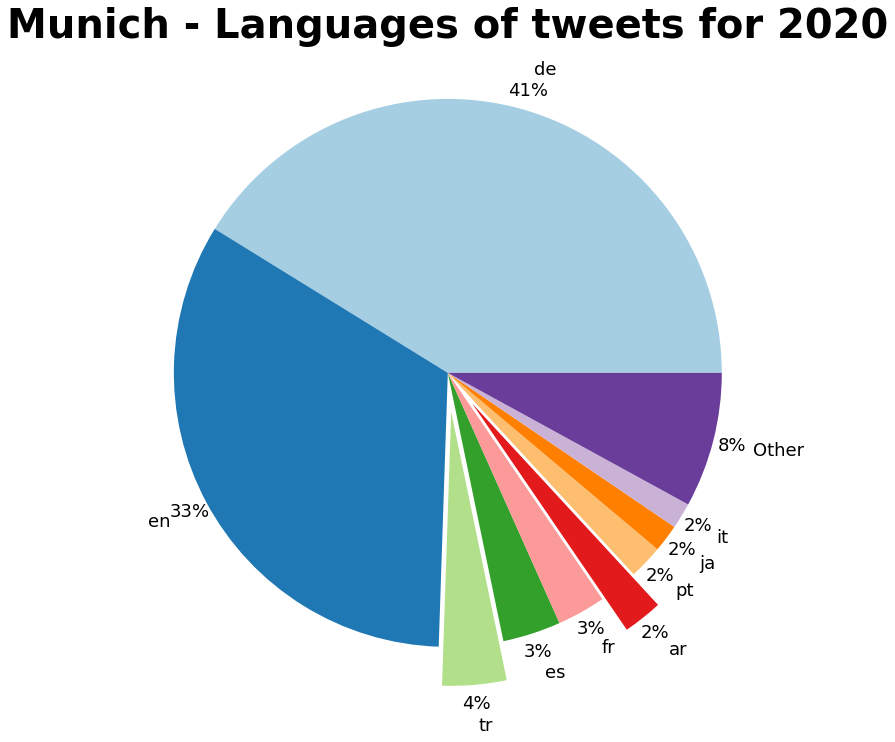

In [136]:
plt.style.use("bmh")
plt.figure(figsize=(17,12))

slices = lang_pie_subset1['Value']
labels = lang_pie_subset1.index
explode = lang_pie_subset1['Explode']
colors = [colormap(i) for i in np.linspace(0,1,12)]

plt.pie(slices, explode=explode, labels=labels, labeldistance=1.15,
        textprops=dict(size=18),  
        autopct='%1.f%%', pctdistance=1.07,
        radius=1.05, colors=colors)

#DONT FORGET TO CHANGE TITLE YEAR
plt.title("Munich - Languages of tweets for 2020", weight="bold", 
          color="black", size=40)
# plt.tight_layout()
plt.show() 

## 3.2.5 Berlin

In [188]:
df_Berlin = df_final_1.loc[df_final_1['city'] == 'berlin']
df_Berlin.head()

,tweet_username,lang,city,tweet_date,user_tweet_count,city_lang_total,city_total,lang_share
63638,KatRyziewicz,nl,berlin,2014-07-20,1,19,2431,0.007816
63639,Isma_pedraza,en,berlin,2019-07-20,1,940,3108,0.302445
63640,Iva10777143,sl,berlin,2020-04-20,1,5,8499,0.000588
63641,sschannak,de,berlin,2017-01-20,1,405,887,0.456595
63642,Karin_Constanza,es,berlin,2019-04-20,1,96,2997,0.032032


In [189]:
#Sanity check: most spoken languages
print(df_Berlin.groupby(["lang"])["lang"].count().reset_index(name="lang_count").sort_values(by='lang_count', ascending=False))

     lang  lang_count
9      en        7029
7      de        6593
10     es         644
41     tr         401
30     pt         276
27     nl         266
14     fr         204
1      ar         187
32     ru         172
20     it         127
19     id         125
21     ja         123
37     sv         108
0      af         101
28     no          86
3      ca          66
35     so          60
6      da          50
12     fa          50
29     pl          50
40     tl          37
11     et          34
39     th          28
13     fi          24
15     he          23
31     ro          23
2      bg          21
5      cy          21
17     hr          20
18     hu          18
34     sl          17
22     ko          14
38     sw          11
8      el          10
4      cs          10
36     sq          10
24     lv           9
42     uk           9
25     mk           9
44     vi           6
43     ur           5
45  zh-cn           5
33     sk           5
23     lt           3
26     ne 

In [190]:
#by Group
#create table with total daily counts
BRday_total_count = df_Berlin.groupby(["tweet_date"])["lang"].count()\
                                             .reset_index(name="day_total_count")
BRday_total_count.head()

,tweet_date,day_total_count
0,2014-04-20,655
1,2014-07-20,789
2,2014-10-20,568
3,2015-01-20,731
4,2015-04-20,766


In [191]:
# Create data frame (lang_pie_BR3_pivot) with share of language per date per language
BRlang_pie = df_Berlin.groupby(["tweet_date","lang"])["lang"].count().reset_index(name="lang_day_count").sort_values(by=['lang','tweet_date'])
BRlang_pie2 = BRlang_pie.merge(BRday_total_count, left_on='tweet_date', right_on='tweet_date')
BRlang_pie2['lang_share_day'] = BRlang_pie2.lang_day_count/BRlang_pie2.day_total_count*100
BRlang_pie3 = BRlang_pie2.set_index(['tweet_date','lang'], drop = False)
BRlang_pie3_pivot = BRlang_pie3.pivot(index='tweet_date', columns='lang', values='lang_share_day')

In [192]:
BRlang_pie3_pivot = BRlang_pie3_pivot.fillna(0)
BRlang_pie3_pivot.head()

lang,af,ar,bg,ca,cs,cy,da,de,el,en,...,sv,sw,th,tl,tr,uk,ur,vi,zh-cn,zh-tw
tweet_date,,,,,,,,,,,,,,,,,,,,,
2014-04-20,0.763359,1.221374,0.305344,0.458015,0.000000,0.305344,0.305344,35.877863,0.152672,38.473282,...,1.068702,0.000000,0.152672,0.458015,3.358779,0.000000,0.152672,0.000000,0.0,0.0
2014-07-20,0.633714,1.394170,0.253485,0.253485,0.000000,0.126743,0.506971,31.432193,0.000000,43.219265,...,0.633714,0.000000,0.253485,0.126743,2.408112,0.126743,0.000000,0.126743,0.0,0.0
2014-10-20,0.176056,0.704225,0.176056,0.176056,0.000000,0.000000,0.176056,40.492958,0.176056,38.204225,...,0.704225,0.176056,0.176056,0.176056,3.169014,0.000000,0.000000,0.176056,0.0,0.0
2015-01-20,0.957592,1.094391,0.000000,0.410397,0.273598,0.000000,0.136799,35.841313,0.136799,45.006840,...,0.683995,0.136799,0.000000,0.410397,2.872777,0.000000,0.000000,0.136799,0.0,0.0
2015-04-20,0.913838,1.305483,0.000000,0.652742,0.130548,0.130548,0.261097,41.775457,0.130548,36.814621,...,0.913838,0.000000,0.261097,0.391645,2.872063,0.000000,0.130548,0.000000,0.0,0.0


In [193]:
#create df per year with language and language share
BRlang_pie2014 = pd.DataFrame(BRlang_pie3_pivot.iloc[0:3].mean(axis=0).sort_values(ascending=False)).rename(columns={0:'Value'})
BRlang_pie2015 = pd.DataFrame(BRlang_pie3_pivot.iloc[3:7].mean(axis=0).sort_values(ascending=False)).rename(columns={0:'Value'})
BRlang_pie2016 = pd.DataFrame(BRlang_pie3_pivot.iloc[7:11].mean(axis=0).sort_values(ascending=False)).rename(columns={0:'Value'})
BRlang_pie2017 = pd.DataFrame(BRlang_pie3_pivot.iloc[11:15].mean(axis=0).sort_values(ascending=False)).rename(columns={0:'Value'})
BRlang_pie2018 = pd.DataFrame(BRlang_pie3_pivot.iloc[15:19].mean(axis=0).sort_values(ascending=False)).rename(columns={0:'Value'})
BRlang_pie2019 = pd.DataFrame(BRlang_pie3_pivot.iloc[19:23].mean(axis=0).sort_values(ascending=False)).rename(columns={0:'Value'})
BRlang_pie2020 = pd.DataFrame(BRlang_pie3_pivot.iloc[23:].mean(axis=0).sort_values(ascending=False)).rename(columns={0:'Value'})

#Sanity check: sum must be 100
print(BRlang_pie2014.sum())
print(BRlang_pie2017.sum())
print(BRlang_pie2020.sum())

Value    100.0
dtype: float64
Value    100.0
dtype: float64
Value    100.0
dtype: float64


In [213]:
#SELECT YEAR of Berlin TO PLOT HERE
pie = BRlang_pie2020

#define the threshold 
threshold = 1

lang_pie_subset1 =  pie[pie['Value'] >= threshold]
lang_pie_subset2 =  pie[pie['Value'] < threshold]
lang_pie_subset1.loc['Other'] = lang_pie_subset2.sum()

# To explode arabic and turkish in pie chart later on...
lang_pie_subset1['Explode'] = 0
lang_pie_subset1.loc[lang_pie_subset1.index == 'tr', 'Explode'] = 0.15
lang_pie_subset1.loc[lang_pie_subset1.index == 'ar', 'Explode'] = 0.15

lang_pie_subset1

C:\Users\juans\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\juans\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\juans\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing

,Value,Explode
lang,,
de,41.984776,0.00
en,33.093379,0.00
es,4.114010,0.00
tr,3.270349,0.15
pt,2.485463,0.00
ar,1.691708,0.15
fr,1.551283,0.00
ja,1.522910,0.00
ru,1.107624,0.00


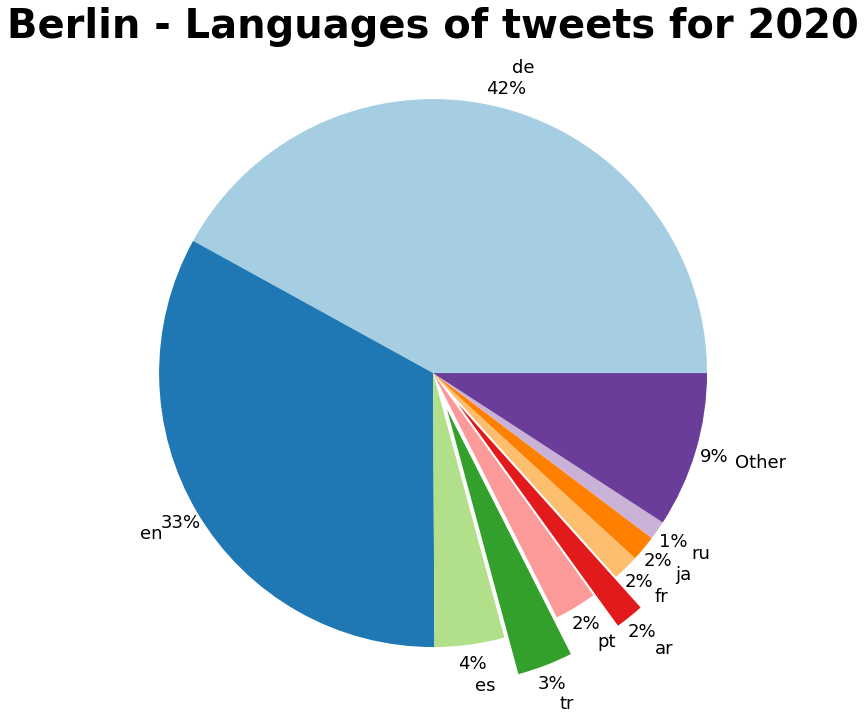

In [214]:
plt.style.use("bmh")
plt.figure(figsize=(17,12))

slices = lang_pie_subset1['Value']
labels = lang_pie_subset1.index
explode = lang_pie_subset1['Explode']
colors = [colormap(i) for i in np.linspace(0,1,12)]

plt.pie(slices, explode=explode, labels=labels, labeldistance=1.15,
        textprops=dict(size=18),  
        autopct='%1.f%%', pctdistance=1.07,
        radius=1.05, colors=colors)

#DONT FORGET TO CHANGE TITLE YEAR
plt.title("Berlin - Languages of tweets for 2020", weight="bold", 
          color="black", size=40)
# plt.tight_layout()
plt.show() 

In [198]:
# #defining the threshold 
# threshold = 1
# BRlang_pie2018_subset1 =  BRlang_pie2018[BRlang_pie2018['Value'] >= threshold]
# BRlang_pie2018_subset2 =  BRlang_pie2018[BRlang_pie2018['Value'] < threshold]
# BRlang_pie2018_subset1.loc['Other']= BRlang_pie2018_subset2.sum()

# BRplot1 = BRlang_pie2018_subset1.plot.pie(y='Value', figsize=(10, 10),autopct='%1.1f%%')
# BRplot1.set_title("Berlin - Languages of all tweets 2018", weight="bold", color="black", size=20)

## 3.2.5 Paris

In [217]:
df_Paris = df_final_1.loc[df_final_1['city'] == 'paris']
df_Paris.head()

,tweet_username,lang,city,tweet_date,user_tweet_count,city_lang_total,city_total,lang_share
0,zzzkaki,ja,paris,2017-07-20,1,12,1882,0.006376
1,TPhiizL,en,paris,2014-10-20,2,703,8970,0.078372
2,ozgurozsar,tr,paris,2016-04-20,1,12,2887,0.004157
3,ozgurozgencer,tr,paris,2019-04-20,1,106,8764,0.012095
4,TMontparnasse,fr,paris,2019-10-20,1,6716,8445,0.795263


In [218]:
#Sanity check: most spoken languages
print(df_Paris.groupby(["lang"])["lang"].count().reset_index(name="lang_count").sort_values(by='lang_count', ascending=False))

     lang  lang_count
15     fr       24848
10     en       10694
11     es        1140
31     pt         664
21     it         476
8      de         356
28     nl         348
1      ar         289
4      ca         288
20     id         240
43     tr         210
22     ja         169
32     ro         165
0      af         128
33     ru         127
36     so         120
29     no         107
12     et          97
42     tl          93
14     fi          76
38     sv          70
6      cy          58
24     lt          53
35     sl          44
7      da          42
18     hr          38
30     pl          36
39     sw          34
23     ko          33
41     th          32
25     lv          31
46     vi          25
37     sq          23
13     fa          21
34     sk          15
19     hu          15
2      bg          15
45     ur          14
5      cs          14
16     he          11
47  zh-cn           7
26     mk           6
9      el           4
40     ta           3
3      bn 

In [219]:
#by Group
#create table with total daily counts
PAday_total_count = df_Paris.groupby(["tweet_date"])["lang"].count()\
                                             .reset_index(name="day_total_count")
PAday_total_count.head()

,tweet_date,day_total_count
0,2014-04-20,1755
1,2014-07-20,1831
2,2014-10-20,1684
3,2015-01-20,1830
4,2015-04-20,1872


In [220]:
# Create data frame (lang_pie_PA3_pivot) with share of language per date per language
PAlang_pie = df_Paris.groupby(["tweet_date","lang"])["lang"].count().reset_index(name="lang_day_count").sort_values(by=['lang','tweet_date'])
PAlang_pie2 = PAlang_pie.merge(PAday_total_count, left_on='tweet_date', right_on='tweet_date')
PAlang_pie2['lang_share_day'] = PAlang_pie2.lang_day_count/PAlang_pie2.day_total_count*100
PAlang_pie3 = PAlang_pie2.set_index(['tweet_date','lang'], drop = False)
PAlang_pie3_pivot = PAlang_pie3.pivot(index='tweet_date', columns='lang', values='lang_share_day')

In [221]:
PAlang_pie3_pivot = PAlang_pie3_pivot.fillna(0)
PAlang_pie3_pivot.head()

lang,af,ar,bg,bn,ca,cs,cy,da,de,el,...,sw,ta,th,tl,tr,uk,ur,vi,zh-cn,zh-tw
tweet_date,,,,,,,,,,,,,,,,,,,,,
2014-04-20,0.398860,0.227920,0.000000,0.0,1.310541,0.113960,0.227920,0.227920,0.683761,0.0,...,0.227920,0.000000,0.000000,0.341880,0.398860,0.0,0.000000,0.170940,0.000000,0.0
2014-07-20,0.163845,0.273075,0.109230,0.0,0.928454,0.054615,0.327690,0.109230,1.037684,0.0,...,0.327690,0.000000,0.054615,0.382305,0.163845,0.0,0.000000,0.000000,0.000000,0.0
2014-10-20,0.712589,0.475059,0.000000,0.0,0.771971,0.000000,0.237530,0.000000,0.771971,0.0,...,0.118765,0.000000,0.000000,0.237530,0.178147,0.0,0.000000,0.059382,0.000000,0.0
2015-01-20,0.601093,0.546448,0.000000,0.0,0.655738,0.054645,0.109290,0.054645,0.819672,0.0,...,0.109290,0.054645,0.000000,0.273224,0.437158,0.0,0.000000,0.000000,0.054645,0.0
2015-04-20,0.534188,0.373932,0.106838,0.0,0.747863,0.000000,0.373932,0.160256,1.282051,0.0,...,0.213675,0.000000,0.053419,0.267094,0.480769,0.0,0.053419,0.106838,0.000000,0.0


In [222]:
#create df per year with language and language share
PAlang_pie2014 = pd.DataFrame(PAlang_pie3_pivot.iloc[0:3].mean(axis=0).sort_values(ascending=False)).rename(columns={0:'Value'})
PAlang_pie2015 = pd.DataFrame(PAlang_pie3_pivot.iloc[3:7].mean(axis=0).sort_values(ascending=False)).rename(columns={0:'Value'})
PAlang_pie2016 = pd.DataFrame(PAlang_pie3_pivot.iloc[7:11].mean(axis=0).sort_values(ascending=False)).rename(columns={0:'Value'})
PAlang_pie2017 = pd.DataFrame(PAlang_pie3_pivot.iloc[11:15].mean(axis=0).sort_values(ascending=False)).rename(columns={0:'Value'})
PAlang_pie2018 = pd.DataFrame(PAlang_pie3_pivot.iloc[15:19].mean(axis=0).sort_values(ascending=False)).rename(columns={0:'Value'})
PAlang_pie2019 = pd.DataFrame(PAlang_pie3_pivot.iloc[19:23].mean(axis=0).sort_values(ascending=False)).rename(columns={0:'Value'})
PAlang_pie2020 = pd.DataFrame(PAlang_pie3_pivot.iloc[23:].mean(axis=0).sort_values(ascending=False)).rename(columns={0:'Value'})

#Sanity check: sum must be 100
print(PAlang_pie2014.sum())
print(PAlang_pie2017.sum())
print(PAlang_pie2020.sum())

Value    100.0
dtype: float64
Value    100.0
dtype: float64
Value    100.0
dtype: float64


In [235]:
#SELECT YEAR of Paris TO PLOT HERE
pie = PAlang_pie2014

#define the threshold 
threshold = 1

lang_pie_subset1 =  pie[pie['Value'] >= threshold]
lang_pie_subset2 =  pie[pie['Value'] < threshold]
lang_pie_subset1.loc['Other'] = lang_pie_subset2.sum()

# To explode arabic and turkish in pie chart later on...
lang_pie_subset1['Explode'] = 0
lang_pie_subset1.loc[lang_pie_subset1.index == 'tr', 'Explode'] = 0.15
lang_pie_subset1.loc[lang_pie_subset1.index == 'ar', 'Explode'] = 0.15

lang_pie_subset1

C:\Users\juans\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\juans\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\juans\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing

,Value,Explode
lang,,
fr,74.910162,0.0
en,10.044977,0.0
es,1.661464,0.0
it,1.538772,0.0
nl,1.206263,0.0
pt,1.113699,0.0
ca,1.003656,0.0
Other,8.521006,0.0


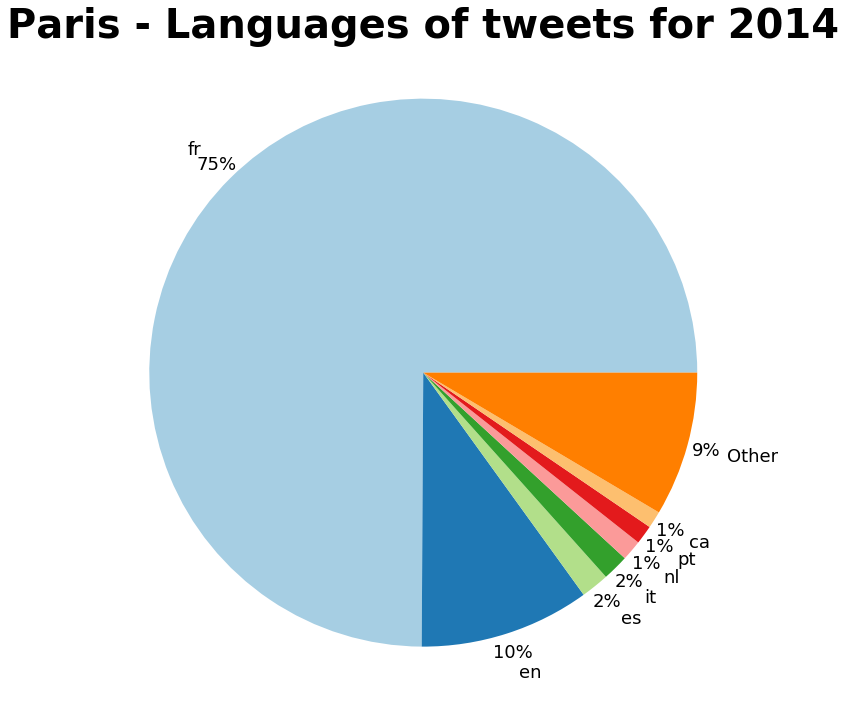

In [236]:
plt.style.use("bmh")
plt.figure(figsize=(17,12))

slices = lang_pie_subset1['Value']
labels = lang_pie_subset1.index
explode = lang_pie_subset1['Explode']
colors = [colormap(i) for i in np.linspace(0,1,12)]

plt.pie(slices, explode=explode, labels=labels, labeldistance=1.15,
        textprops=dict(size=18),  
        autopct='%1.f%%', pctdistance=1.07,
        radius=1.05, colors=colors)

#DONT FORGET TO CHANGE TITLE YEAR
plt.title("Paris - Languages of tweets for 2014", weight="bold", 
          color="black", size=40)
# plt.tight_layout()
plt.show() 